### RaschPy PCM worked example

This notebook works through a sample Rasch analysis of a simulated data set (1,000 persons, 10 items - 4 with a maximum score of 5 and 6 with a maximum score of 3, and no missing data), taking you through the relevant commands step by step, with notes before each cell. Relevant outputs will appear below each cell.

Import the modules and set the working directory (here called `my_working_directory`)to where you have saved the `pcm_scores.csv` file - you will also save your output files here.

In [29]:
import RaschPy as rp
import os

os.chdir('my_working_directory')

Import the data

In [30]:
data, invalid_responses = rp.loadup_pcm('pcm_scores.csv', max_score_vector=[5, 5, 5, 5, 3, 3, 3, 3, 3, 3])

Check the data - view the first two lines

In [31]:
data.head(2)

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
Person_1,3.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0
Person_2,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


Check for any invalid responses (not usable for estimation purposes and excluded)

In [32]:
invalid_responses

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10


Create an SLM object from the data

In [33]:
pcm = rp.PCM(data)

Generate item estimates. The `%%time` "magic function" returns the time taken to run the cell contents (algorithm run time in this case).

In [34]:
%%time
pcm.calibrate()

CPU times: total: 31.2 ms
Wall time: 34.3 ms


Check the item difficult estimates - view the first two items

In [35]:
pcm.central_diffs.head(2)

Item_1    0.174811
Item_2    0.603047
dtype: float64

Generate a table of item statistics (and check run time), and save to file

In [36]:
%%time
pcm.item_stats_df()
pcm.item_stats.to_csv('pcm_item_stats.csv')

CPU times: total: 43.2 s
Wall time: 35.4 s


Check the item statistics table - view the first two items

In [37]:
pcm.item_stats.head(2)

,Estimate,SE,Count,Facility,Infit MS,Outfit MS
Item_1,0.175,0.074,1000,0.494,0.916,0.899
Item_2,0.603,0.051,1000,0.414,0.890,0.891


Generate a table of threshold statistics (and check run time), and save to file

In [38]:
%%time
pcm.threshold_stats_df()
pcm.threshold_stats_centred.to_csv('pcm_threshold_stats_centred.csv')
pcm.threshold_stats_uncentred.to_csv('pcm_threshold_stats_uncentred.csv')

CPU times: total: 0 ns
Wall time: 5.98 ms


Check the centred threshold statistics table - view the first two thresholds

In [39]:
pcm.threshold_stats_centred.head(2)

Estimate     SE  Infit MS  Infit Z  Outfit MS  Outfit Z
Item_1 1    -3.623  0.221     0.984   -0.136      0.928    -0.362
       2    -1.245  0.120     0.966   -0.751      0.912    -1.264

Check the uncentred threshold statistics table - view the first two items

In [40]:
pcm.threshold_stats_uncentred.head(2)

Estimate     SE  Infit MS  Infit Z  Outfit MS  Outfit Z
Item_1 1    -3.448  0.221     0.984   -0.136      0.928    -0.362
       2    -1.070  0.120     0.966   -0.751      0.912    -1.264

Generate a table of person statistics (and check run time, and save to file

In [41]:
%%time
pcm.person_stats_df()
pcm.person_stats.to_csv('pcm_person_stats.csv')

CPU times: total: 0 ns
Wall time: 14 ms


C:\Users\elliom\AppData\Local\anaconda3\Lib\RaschPy\__init__.py:3795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  person_stats_df['Infit MS'].update(self.person_infit_ms.round(dp))
C:\Users\elliom\AppData\Local\anaconda3\Lib\RaschPy\__init__.py:3796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

Check the person statistics table - view the first two items

In [42]:
pcm.person_stats.head(2)

,Estimate,CSEM,Score,Max score,p,Infit MS,Infit Z,Outfit MS,Outfit Z
Person_1,2.980,0.548,32,38,0.842,0.840,-0.164,0.923,0.143
Person_2,-0.414,0.437,17,38,0.447,0.992,0.121,1.088,0.345


Generate a table of test-level statistics (and check run time, and save to file

In [43]:
%%time
pcm.test_stats_df()
pcm.test_stats.to_csv('pcm_test_stats.csv')

CPU times: total: 0 ns
Wall time: 3.08 ms


Check the test statistics table

In [44]:
pcm.test_stats

,Items,Thresholds,Persons
Mean,-0.101,0.000,0.024
SD,1.094,2.342,1.673
Separation ratio,14.915,13.424,3.465
Strata,20.220,18.232,4.953
Reliability,0.996,0.994,0.923


Run a residual correlation analysis (and check run time, and save relevant output to file

In [45]:
%%time
pcm.res_corr_analysis()
pcm.residual_correlations.to_csv('pcm_residual_correlations.csv')
pcm.loadings.to_csv('pcm_loadings.csv')

CPU times: total: 0 ns
Wall time: 6.98 ms


View the table of pairwise standard residual correlations

In [46]:
pcm.residual_correlations

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
Item_1,1.000000,-0.098585,-0.118820,-0.149157,-0.168978,-0.128947,-0.098891,-0.103747,-0.135241,-0.092653
Item_2,-0.098585,1.000000,-0.180903,-0.161264,-0.141251,-0.090529,-0.072673,-0.111032,-0.081146,-0.087126
Item_3,-0.118820,-0.180903,1.000000,-0.102739,-0.078517,-0.131149,-0.110598,-0.077200,-0.107654,-0.113991
Item_4,-0.149157,-0.161264,-0.102739,1.000000,-0.080387,-0.125871,-0.092177,-0.115844,-0.104183,-0.056675
Item_5,-0.168978,-0.141251,-0.078517,-0.080387,1.000000,-0.080141,-0.141855,-0.132363,-0.045694,-0.110613
Item_6,-0.128947,-0.090529,-0.131149,-0.125871,-0.080141,1.000000,-0.054897,-0.122274,-0.087065,-0.136680
Item_7,-0.098891,-0.072673,-0.110598,-0.092177,-0.141855,-0.054897,1.000000,-0.058085,-0.104860,-0.131486
Item_8,-0.103747,-0.111032,-0.077200,-0.115844,-0.132363,-0.122274,-0.058085,1.000000,-0.056817,-0.112925
Item_9,-0.135241,-0.081146,-0.107654,-0.104183,-0.045694,-0.087065,-0.104860,-0.056817,1.000000,-0.105267
Item_10,-0.092653,-0.087126,-0.113991,-0.056675,-0.110613,-0.136680,-0.131486,-0.112925,-0.105267,1.000000


View the item loadings on the first principal component of the pairwise standard residual correlations (dimensionality test)

In [47]:
pcm.loadings['PC 1']

Item_1     0.159621
Item_2     0.204532
Item_3    -0.148505
Item_4    -0.153195
Item_5    -0.203823
Item_6     0.047413
Item_7     0.124868
Item_8     0.036143
Item_9    -0.052613
Item_10   -0.022408
Name: PC 1, dtype: float64

Produce an item characteristic curve (item response function) curve for Item 2, with oberved category means plotted and the thresholds marked

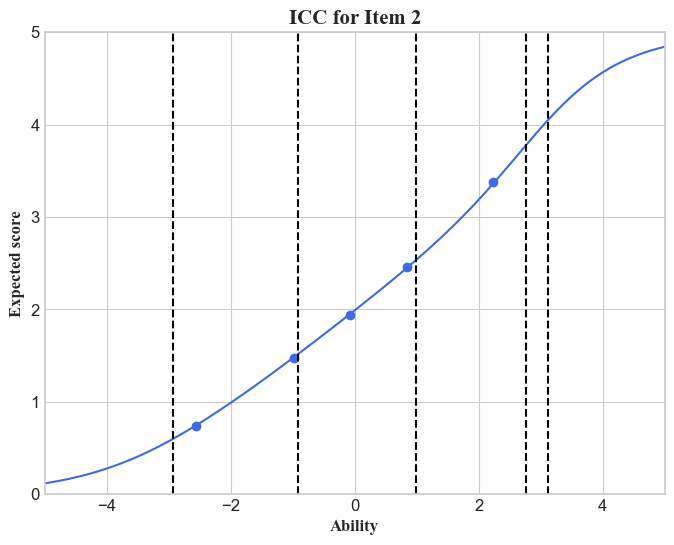

In [48]:
pcm.icc('Item_2', title='ICC for Item 2', obs=True, thresh_lines=True, cat_highlight=[2] , xmin=-5, xmax=5, filename='my_pcm_icc')

Produce category response curves for Item 2, with the central item location marked

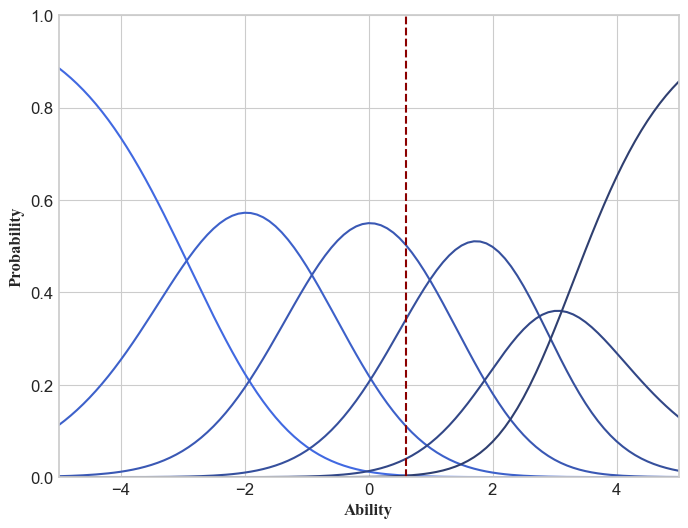

In [49]:
pcm.crcs('Item_2', central_diff=True, xmin=-5, xmax=5, filename='my_pcm_icc')

Produce theshold characteristic curves for Item 2, with oberved category means plotted for thresholds 2 and the central item location marked

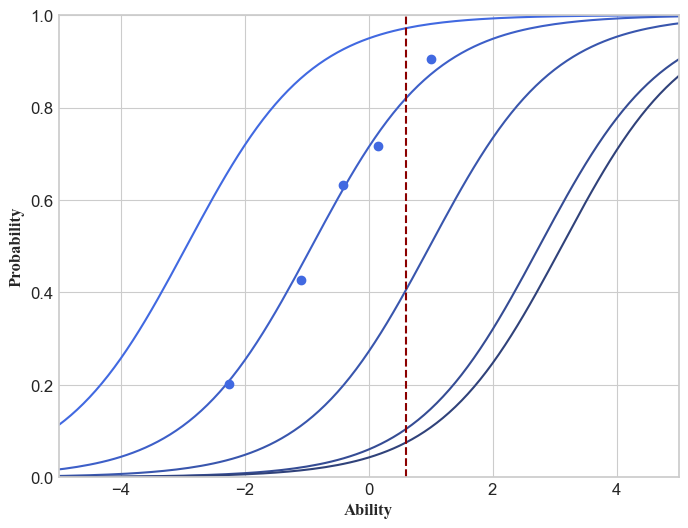

In [50]:
pcm.threshold_ccs('Item_2', central_diff=True, obs=[2], xmin=-5, xmax=5, filename='my_pcm_icc')

Produce an item information function curve for Item 2

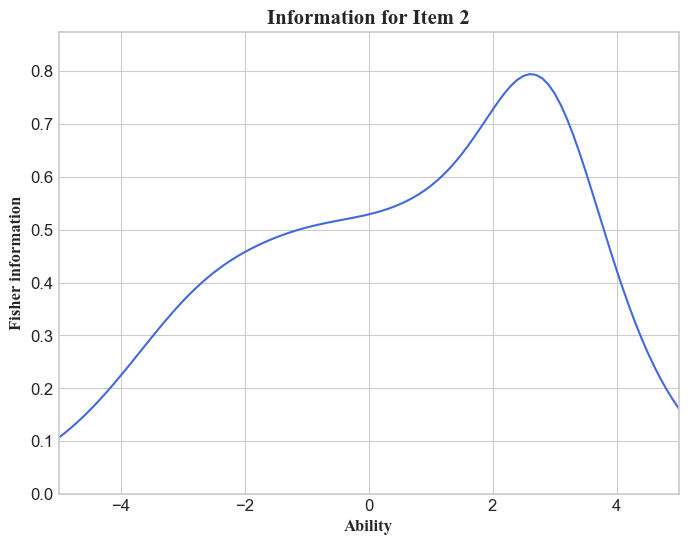

In [51]:
pcm.iic('Item_2', title='Information for Item 2', xmin=-5, xmax=5, filename='my_pcm_iic')

Produce a test characteristic curve (test response function), with abilities corresponding to scores of 15 and 25 plotted.

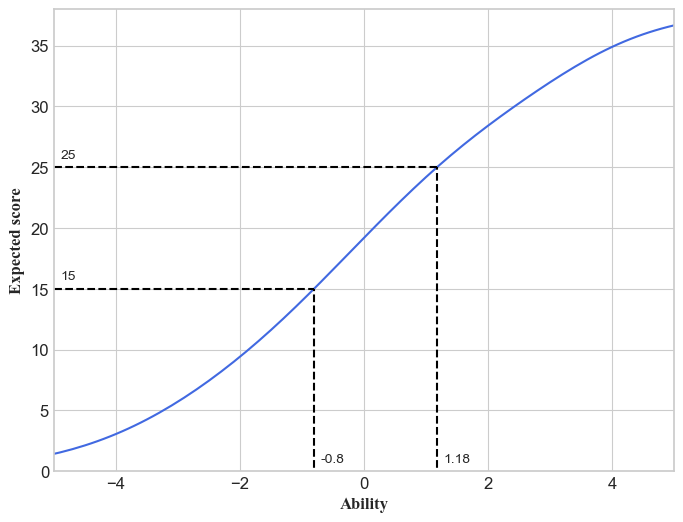

In [52]:
pcm.tcc(score_lines=[15, 25], score_labels=True, filename='my_pcm_tcc')

Produce a test information curve

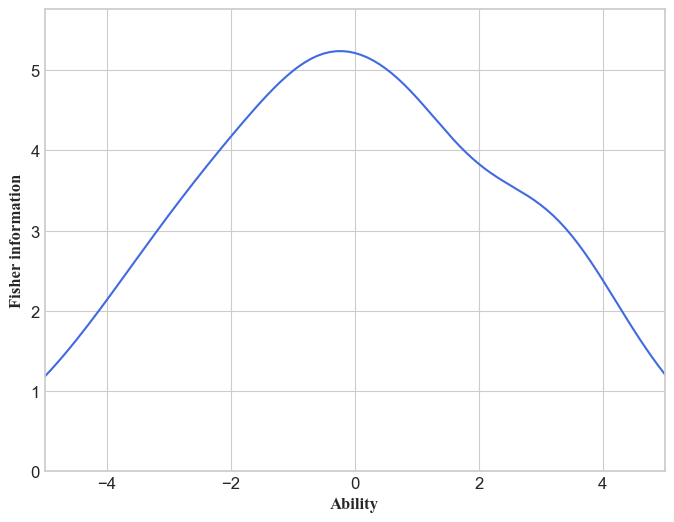

In [53]:
pcm.test_info(filename='my_pcm_test_info_curve')

Produce a test CSEM (conditional standard error of measurement) curve, with the CSEM corresponding to an ability of -3 plotted

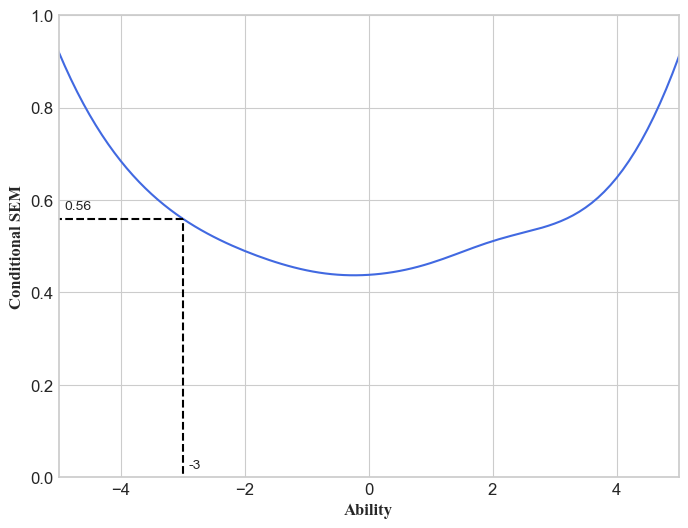

In [54]:
pcm.test_csem(point_csem_lines=[-3], point_csem_labels=True, ymax=1, filename='my_pcm_csem_curve')

Produce a histogram of standardised residuals, with a normal distribution curve overlaid

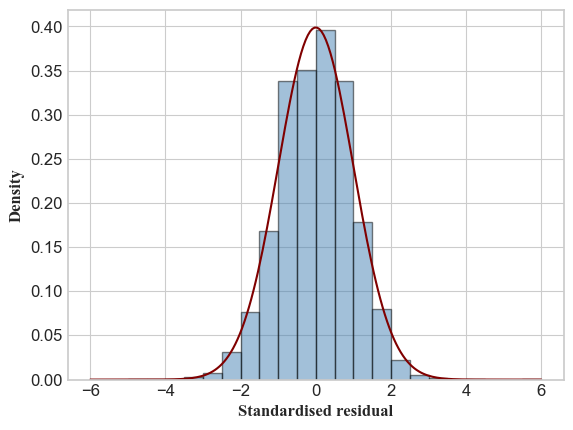

In [55]:
pcm.std_residuals_plot(bin_width=0.6, normal=True, filename='my_pcm_std_residuals_plot')

(Not RaschPy functionality) Use `matplotlib` to plot uncentred threshold estimates against generating threshold locations

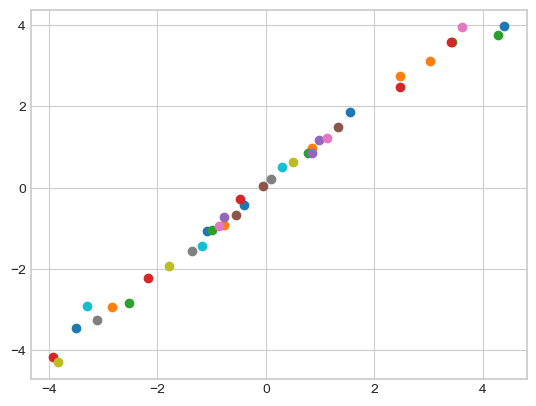

In [56]:
import pandas as pd
from matplotlib import pyplot as plt

orig_thresholds = pd.read_csv('pcm_generating_uncentred_thresholds.csv', index_col=0).T

for i in range(10):
    plt.scatter(orig_thresholds[f'Item_{i+1}'][:pcm.max_score_vector[f'Item_{i+1}']],
                pcm.thresholds_uncentred[f'Item_{i+1}'])